In [14]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
#import pygraphviz as viz
import networkx as nx
import pandas as pd
import random
import numpy as np
from utils.draw import draw_graph, draw_partition, draw_partition2, draw_partition3

In [2]:
df = pd.read_csv('vk_links.csv')
df

,out_f,in_f
0,alisaborkova,anonskinonoch
1,tereshina,anonskinonoch
2,sinart,anonskinonoch
3,julietta.leks,anonskinonoch
4,irinalerman,anonskinonoch
5,id73902851,anonskinonoch
6,cherenkovaveronika,anonskinonoch
7,cocktailproject,anonskinonoch
8,dimatim,anonskinonoch
9,id84324595,anonskinonoch


In [3]:
users = set(df['out_f']).union(set(df['in_f']))
users = list(users)
index = np.array(range(len(users)))

In [4]:
graph = -np.ones((491,491))

for idx, row in df.iterrows():

    index1 = users.index(row['out_f'])
    index2 = users.index(row['in_f'])

    graph[index1][index2] = 0
    graph[index2][index1] = 0

In [5]:
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_edge(row['out_f'], row['in_f'])

In [8]:
def convert(graph):
    G = nx.Graph()
    G.add_nodes_from(list(range(graph.shape[0])))
    
    for x in range(graph.shape[0]):
        for y in range(x, graph.shape[0]):
            if graph[x][y] == 0:
                G.add_edge(x, y)
    return G


In [10]:
G = convert(graph)

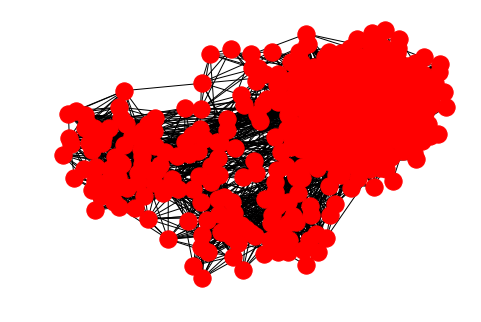

In [12]:
nx.draw(G)

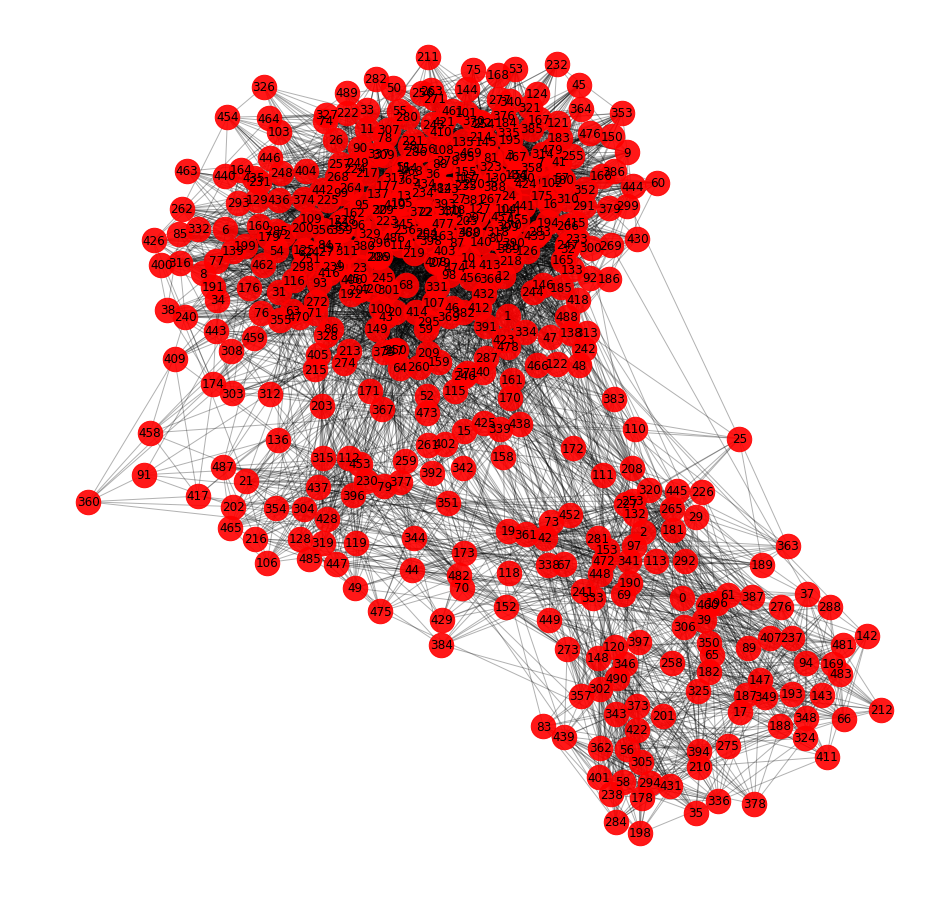

In [15]:
 draw_graph(G) #download the whole repository for this to work

## Best community partition

In [ ]:
from community import community_louvain

In [ ]:
partition = community_louvain.best_partition(G)

In [ ]:
draw_partition2(G, partition)

## k-clique

In [ ]:
from networkx.algorithms.community import k_clique_communities

In [ ]:
def in_which(node, list_of_sets):
    idx = 0
    for s in list_of_sets:
        if node in s:
            return idx
        idx += 1

### k = 6

In [ ]:
c = list(k_clique_communities(G, 5))
partition = [in_which(x, c) for x in list(G.nodes)]

In [ ]:
draw_partition3(G, partition)

## Finding leaders, agents and followers

### Методом обхода в ширину

Найдем роли пользователей в сообществе на примере одного из найденных сообществ

In [ ]:
from collections import defaultdict, OrderedDict

In [ ]:
partition = community_louvain.best_partition(G)
d = defaultdict(list)
for key, value in partition.items():
    d[value].append(key)

In [ ]:
d

Возьмем первое найденное сообщество

In [ ]:
first = G.subgraph(d[0]).copy()

In [ ]:
draw_graph(first)

#### Ранжировка пользователей

 1. Отсортируем пользователей по числу связей
 2. Возьмем 10% с наибольшим числом связей (N)
 3. Возьмем 10% с наименьшим числом связей (M)

Будем считать, что у лидера минимум связей, но при этом максимальный охват.
Выберем из N пользователей того, у кого больше всего связей с M пользователями - будем считать его лидером.

In [ ]:
deg = list(first.degree)
deg.sort(key=lambda tup: tup[1])
top = deg[:int(len(deg)*0.1)]
bot = deg[-int(len(deg)*0.1):]

In [ ]:
leaders = defaultdict(int)
for t in top:
    for n in bot:
        if n[0] in list(first.adj[t[0]]):
            leaders[t[0]] += 1

In [ ]:
import operator
leader = max(leaders.items(), key=operator.itemgetter(1))[0]
leader

In [ ]:
followers = set(first.adj[leader])
followers

In [ ]:
workers = set(first.nodes).difference(followers).difference(set([leader]))
workers

## Find communities function

In [ ]:
def find_communities(filename):
    # Read datafile
    data = pd.read_csv('vk_links.csv')
    # Create graph
    G = nx.Graph()
    for idx, row in data.iterrows():
        G.add_edge(row['out_f'], row['in_f'])
    # Find best partition
    partition = community_louvain.best_partition(G)
    d = defaultdict(list)
    for key, value in partition.items():
        d[value].append(key)
    # Find leaders, followers, workers
    with open('result.csv', 'w+') as file:
        file.write("User;Community_ID;User_Type\n")
        for com_id, com_mem in d.items():
            subgraph = G.subgraph(com_mem)
            deg = list(subgraph.degree)
            deg.sort(key=lambda tup: tup[1])
            top = deg[:int(len(deg)*0.1)]
            bot = deg[-int(len(deg)*0.1):]
            leaders = defaultdict(int)
            for t in top:
                for n in bot:
                    if n[0] in list(subgraph.adj[t[0]]):
                        leaders[t[0]] += 1
            leader = max(leaders.items(), key=operator.itemgetter(1))[0]
            followers = set(subgraph.adj[leader])
            workers = set(subgraph.nodes).difference(followers).difference(set([leader]))
            file.write(f"{leader};{com_id};leader\n")
            for f in followers:
                file.write(f"{f};{com_id};follower\n")
            for w in workers:
                file.write(f"{w};{com_id};agent\n")

In [ ]:
find_communities("vk_links.csv")

In [ ]:
df = pd.read_csv("result.csv", sep=';')

In [ ]:
df